In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy import stats

# For visualizations in Jupyter Notebook
%matplotlib inline


In [2]:
# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5, np.nan, 7, 8, 9, 10],
    'B': [5, 6, 7, 8, 9, 10, 11, 12, np.nan, 14],
    'C': ['cat', 'dog', 'cat', 'dog', np.nan, 'dog', 'cat', 'cat', 'dog', 'dog'],
    'D': ['high', 'medium', 'medium', 'low', 'high', 'low', 'high', 'medium', 'low', 'high']
}

df = pd.DataFrame(data)
print("Initial DataFrame:\n", df)


Initial DataFrame:
       A     B    C       D
0   1.0   5.0  cat    high
1   2.0   6.0  dog  medium
2   NaN   7.0  cat  medium
3   4.0   8.0  dog     low
4   5.0   9.0  NaN    high
5   NaN  10.0  dog     low
6   7.0  11.0  cat    high
7   8.0  12.0  cat  medium
8   9.0   NaN  dog     low
9  10.0  14.0  dog    high


In [5]:
print("\nMissing values in each column:\n", df.isnull().sum())



Missing values in each column:
 A    2
B    1
C    1
D    0
dtype: int64


In [7]:
df_dropped = df.dropna()
print("\nDataFrame after dropping missing values:\n", df_dropped)



DataFrame after dropping missing values:
       A     B    C       D
0   1.0   5.0  cat    high
1   2.0   6.0  dog  medium
3   4.0   8.0  dog     low
6   7.0  11.0  cat    high
7   8.0  12.0  cat  medium
9  10.0  14.0  dog    high


In [9]:
imputer = SimpleImputer(strategy='mean')
df['A'] = imputer.fit_transform(df[['A']])
df['B'] = imputer.fit_transform(df[['B']])
print("\nDataFrame after imputing missing values:\n", df)



DataFrame after imputing missing values:
        A          B    C       D
0   1.00   5.000000  cat    high
1   2.00   6.000000  dog  medium
2   5.75   7.000000  cat  medium
3   4.00   8.000000  dog     low
4   5.00   9.000000  NaN    high
5   5.75  10.000000  dog     low
6   7.00  11.000000  cat    high
7   8.00  12.000000  cat  medium
8   9.00   9.111111  dog     low
9  10.00  14.000000  dog    high


In [11]:
label_encoder = LabelEncoder()
df['C'] = label_encoder.fit_transform(df['C'].astype(str))
print("\nDataFrame after label encoding column C:\n", df)



DataFrame after label encoding column C:
        A          B  C       D
0   1.00   5.000000  0    high
1   2.00   6.000000  1  medium
2   5.75   7.000000  0  medium
3   4.00   8.000000  1     low
4   5.00   9.000000  2    high
5   5.75  10.000000  1     low
6   7.00  11.000000  0    high
7   8.00  12.000000  0  medium
8   9.00   9.111111  1     low
9  10.00  14.000000  1    high


In [13]:
df = pd.get_dummies(df, columns=['D'], drop_first=True)
print("\nDataFrame after one-hot encoding column D:\n", df)



DataFrame after one-hot encoding column D:
        A          B  C  D_low  D_medium
0   1.00   5.000000  0  False     False
1   2.00   6.000000  1  False      True
2   5.75   7.000000  0  False      True
3   4.00   8.000000  1   True     False
4   5.00   9.000000  2  False     False
5   5.75  10.000000  1   True     False
6   7.00  11.000000  0  False     False
7   8.00  12.000000  0  False      True
8   9.00   9.111111  1   True     False
9  10.00  14.000000  1  False     False


In [15]:
scaler = StandardScaler()
df[['A', 'B']] = scaler.fit_transform(df[['A', 'B']])
print("\nDataFrame after Standardization:\n", df)



DataFrame after Standardization:
           A         B  C  D_low  D_medium
0 -1.728702 -1.566335  0  False     False
1 -1.364765 -1.185335  1  False      True
2  0.000000 -0.804334  0  False      True
3 -0.636890 -0.423334  1   True     False
4 -0.272953 -0.042333  2  False     False
5  0.000000  0.338667  1   True     False
6  0.454922  0.719667  0  False     False
7  0.818859  1.100668  0  False      True
8  1.182796  0.000000  1   True     False
9  1.546733  1.862669  1  False     False


In [17]:
min_max_scaler = MinMaxScaler()
df[['A', 'B']] = min_max_scaler.fit_transform(df[['A', 'B']])
print("\nDataFrame after Min-Max Scaling:\n", df)



DataFrame after Min-Max Scaling:
           A         B  C  D_low  D_medium
0  0.000000  0.000000  0  False     False
1  0.111111  0.111111  1  False      True
2  0.527778  0.222222  0  False      True
3  0.333333  0.333333  1   True     False
4  0.444444  0.444444  2  False     False
5  0.527778  0.555556  1   True     False
6  0.666667  0.666667  0  False     False
7  0.777778  0.777778  0  False      True
8  0.888889  0.456790  1   True     False
9  1.000000  1.000000  1  False     False


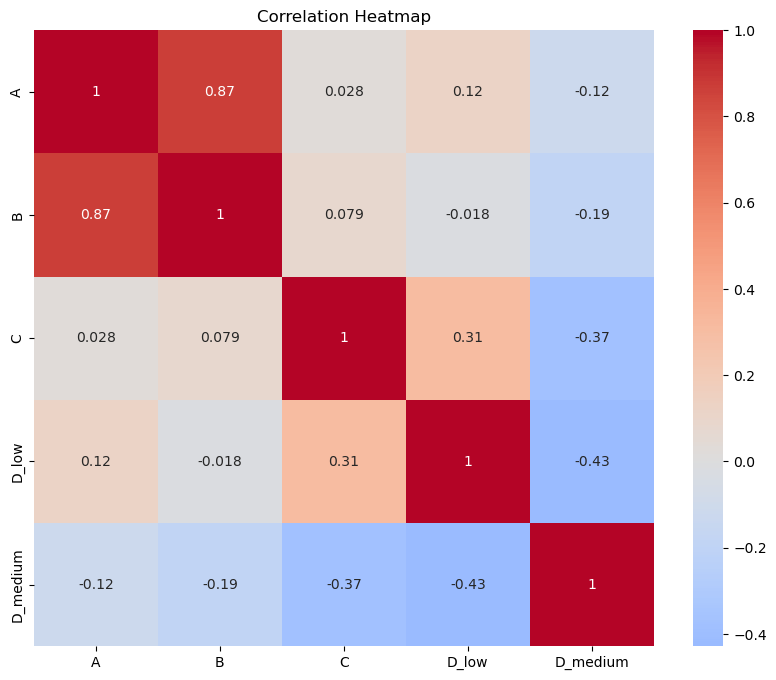

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


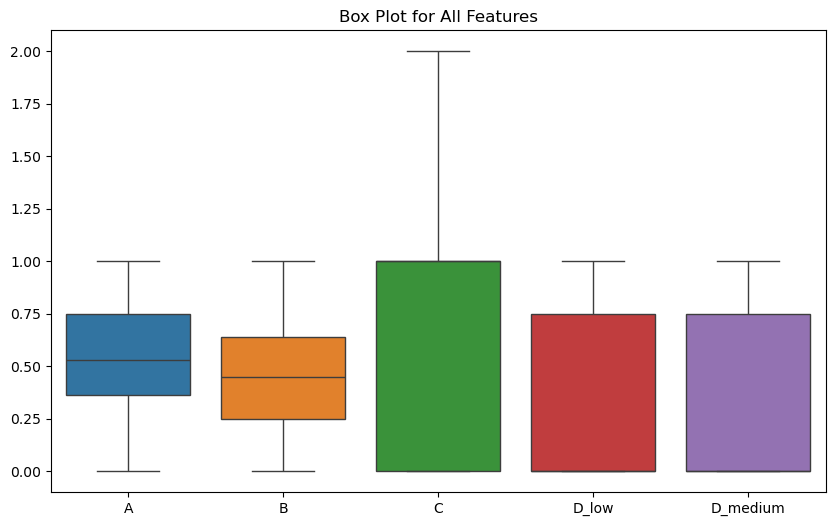

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot for All Features')
plt.show()


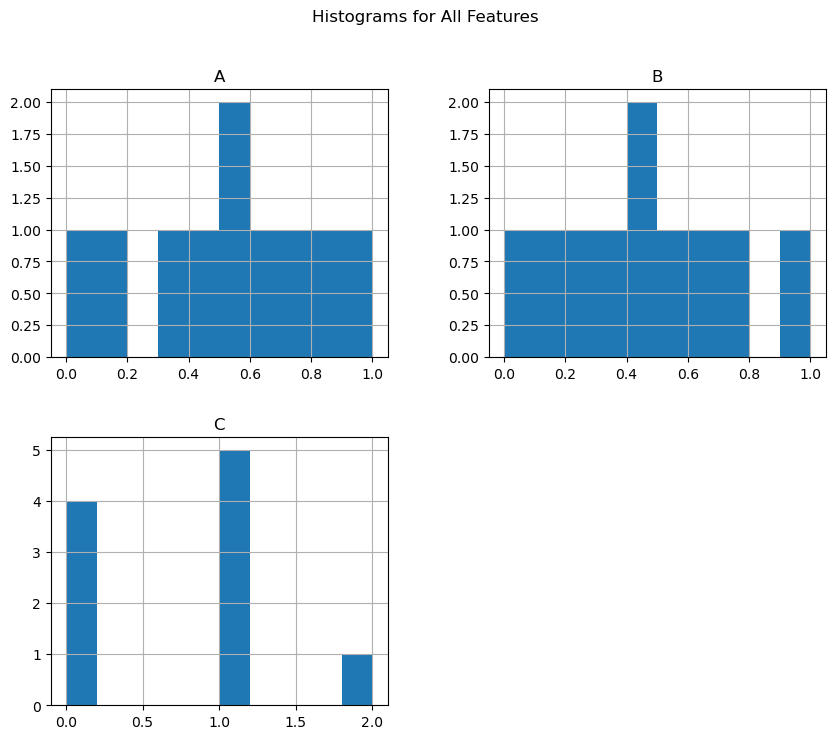

In [23]:
df.hist(figsize=(10, 8))
plt.suptitle('Histograms for All Features')
plt.show()



DataFrame after PCA:
         PC1       PC2
0 -0.697273 -0.031893
1 -0.540192 -0.036020
2 -0.161451  0.170164
3 -0.226031 -0.044274
4 -0.068950 -0.048402
5  0.067979 -0.071648
6  0.245211 -0.056656
7  0.402292 -0.060783
8  0.261963  0.248549
9  0.716453 -0.069038


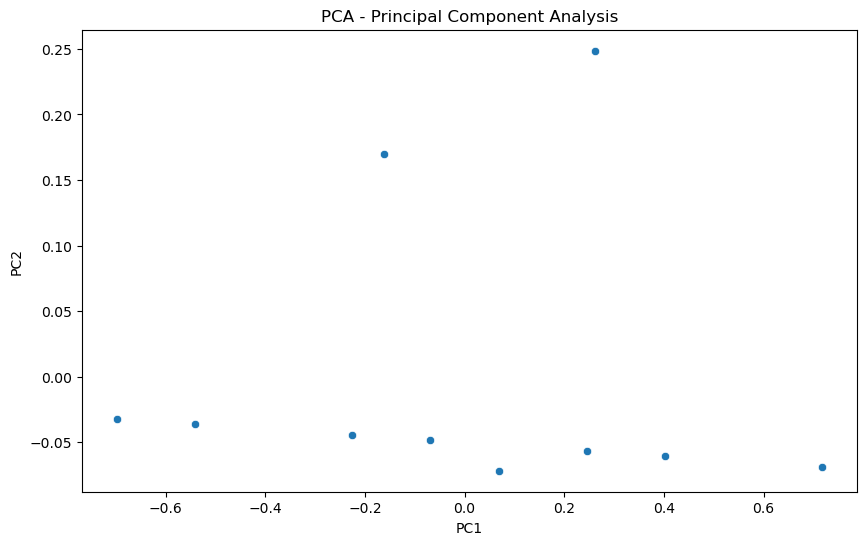

In [29]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['A', 'B']])
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
print("\nDataFrame after PCA:\n", df_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA - Principal Component Analysis')
plt.show()


In [31]:
df['A_squared'] = df['A'] ** 2
print("\nDataFrame after creating a new feature (A_squared):\n", df)



DataFrame after creating a new feature (A_squared):
           A         B  C  D_low  D_medium  A_squared
0  0.000000  0.000000  0  False     False   0.000000
1  0.111111  0.111111  1  False      True   0.012346
2  0.527778  0.222222  0  False      True   0.278549
3  0.333333  0.333333  1   True     False   0.111111
4  0.444444  0.444444  2  False     False   0.197531
5  0.527778  0.555556  1   True     False   0.278549
6  0.666667  0.666667  0  False     False   0.444444
7  0.777778  0.777778  0  False      True   0.604938
8  0.888889  0.456790  1   True     False   0.790123
9  1.000000  1.000000  1  False     False   1.000000


In [33]:
df['log_A'] = np.log1p(df['A'])
print("\nDataFrame after log transformation on A:\n", df)



DataFrame after log transformation on A:
           A         B  C  D_low  D_medium  A_squared     log_A
0  0.000000  0.000000  0  False     False   0.000000  0.000000
1  0.111111  0.111111  1  False      True   0.012346  0.105361
2  0.527778  0.222222  0  False      True   0.278549  0.423814
3  0.333333  0.333333  1   True     False   0.111111  0.287682
4  0.444444  0.444444  2  False     False   0.197531  0.367725
5  0.527778  0.555556  1   True     False   0.278549  0.423814
6  0.666667  0.666667  0  False     False   0.444444  0.510826
7  0.777778  0.777778  0  False      True   0.604938  0.575364
8  0.888889  0.456790  1   True     False   0.790123  0.635989
9  1.000000  1.000000  1  False     False   1.000000  0.693147


In [35]:
z_scores = np.abs(stats.zscore(df[['A', 'B']]))
print("\nZ-scores for detecting outliers:\n", z_scores)



Z-scores for detecting outliers:
           A         B
0  1.728702  1.566335
1  1.364765  1.185335
2  0.000000  0.804334
3  0.636890  0.423334
4  0.272953  0.042333
5  0.000000  0.338667
6  0.454922  0.719667
7  0.818859  1.100668
8  1.182796  0.000000
9  1.546733  1.862669


In [37]:
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("\nDataFrame after removing outliers:\n", df_no_outliers)



DataFrame after removing outliers:
           A         B  C  D_low  D_medium  A_squared     log_A
0  0.000000  0.000000  0  False     False   0.000000  0.000000
1  0.111111  0.111111  1  False      True   0.012346  0.105361
2  0.527778  0.222222  0  False      True   0.278549  0.423814
3  0.333333  0.333333  1   True     False   0.111111  0.287682
4  0.444444  0.444444  2  False     False   0.197531  0.367725
5  0.527778  0.555556  1   True     False   0.278549  0.423814
6  0.666667  0.666667  0  False     False   0.444444  0.510826
7  0.777778  0.777778  0  False      True   0.604938  0.575364
8  0.888889  0.456790  1   True     False   0.790123  0.635989
9  1.000000  1.000000  1  False     False   1.000000  0.693147
